In [1]:
# Cats vs Dogs Classification

In [1]:
# Install TensorFlow Datasets
!pip install tensorflow_datasets

In [2]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

In [3]:
# Load the "cats_vs_dogs" dataset with labels
dataset, dataset_info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.JBKVNY_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
# Get class names like ['cat', 'dog']
class_names = dataset_info.features['label'].names

In [5]:
# Save images into folders: ./cats_vs_dogs/train/cat/ and ./cats_vs_dogs/train/dog/
for index, (img, label) in enumerate(dataset['train']):
    folder = f"./cats_vs_dogs/train/{class_names[label]}"
    os.makedirs(folder, exist_ok=True)  # Make folder if it doesn’t exist
    file_path = os.path.join(folder, f"{class_names[label]}_{index}.jpg")
    tf.keras.preprocessing.image.save_img(file_path, img.numpy())
    print(f"Saved: {file_path}")

Streaming output truncated to the last 5000 lines.
Saved: ./cats_vs_dogs/train/dog/dog_18262.jpg
Saved: ./cats_vs_dogs/train/dog/dog_18263.jpg
Saved: ./cats_vs_dogs/train/cat/cat_18264.jpg
Saved: ./cats_vs_dogs/train/dog/dog_18265.jpg
Saved: ./cats_vs_dogs/train/dog/dog_18266.jpg
Saved: ./cats_vs_dogs/train/cat/cat_18267.jpg
Saved: ./cats_vs_dogs/train/cat/cat_18268.jpg
Saved: ./cats_vs_dogs/train/cat/cat_18269.jpg
Saved: ./cats_vs_dogs/train/dog/dog_18270.jpg
Saved: ./cats_vs_dogs/train/cat/cat_18271.jpg
Saved: ./cats_vs_dogs/train/dog/dog_18272.jpg
Saved: ./cats_vs_dogs/train/dog/dog_18273.jpg
Saved: ./cats_vs_dogs/train/cat/cat_18274.jpg
Saved: ./cats_vs_dogs/train/dog/dog_18275.jpg
Saved: ./cats_vs_dogs/train/cat/cat_18276.jpg
Saved: ./cats_vs_dogs/train/dog/dog_18277.jpg
Saved: ./cats_vs_dogs/train/dog/dog_18278.jpg
Saved: ./cats_vs_dogs/train/dog/dog_18279.jpg
Saved: ./cats_vs_dogs/train/cat/cat_18280.jpg
Saved: ./cats_vs_dogs/train/cat/cat_18281.jpg
Saved: ./cats_vs_dogs/train/d

In [6]:
#  Data Preprocessing with Augmentation
# Create a data generator with augmentation for training and validation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
data_generator = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    validation_split=0.2,      # 20% data for validation
    rotation_range=10,         # Random rotation
    width_shift_range=0.1,     # Random horizontal shift
    height_shift_range=0.1,    # Random vertical shift
    shear_range=0.1,           # Shear transformation
    zoom_range=0.1,            # Random zoom
    horizontal_flip=True,      # Flip images horizontally
    vertical_flip=True         # Flip images vertically
)

In [8]:
# Load training data from directory
train_data = data_generator.flow_from_directory(
    '/content/cats_vs_dogs/train',
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary',
    subset='training'
)

Found 18611 images belonging to 2 classes.


In [9]:
# Load validation data from directory
validation_data = data_generator.flow_from_directory(
    '/content/cats_vs_dogs/train',
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary',
    subset='validation'
)

Found 4651 images belonging to 2 classes.


In [10]:
# Build a CNN model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2),
    BatchNormalization(),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2),
    BatchNormalization(),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2),
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Output: 0 or 1 (binary classification)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
# Compile the model
model.compile(
    loss='binary_crossentropy',  # For binary classification
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.5744 - loss: 3.1329 - val_accuracy: 0.5012 - val_loss: 0.8020
Epoch 2/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.6706 - loss: 0.6134 - val_accuracy: 0.5014 - val_loss: 0.9545
Epoch 3/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7051 - loss: 0.5621 - val_accuracy: 0.6734 - val_loss: 0.6148
Epoch 4/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.7305 - loss: 0.5386 - val_accuracy: 0.6758 - val_loss: 0.6337
Epoch 5/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.7533 - loss: 0.5134 - val_accuracy: 0.6687 - val_loss: 0.7615
Epoch 6/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.7494 - loss: 0.5081 - val_accuracy: 0.7452 - val_loss: 0.5124
Epoch 7/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.7568 - loss: 0.4978 - val_accuracy: 0.7293 - val_loss: 0.5978
Epoch 8/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7691 - loss: 0.4827 - val_accu

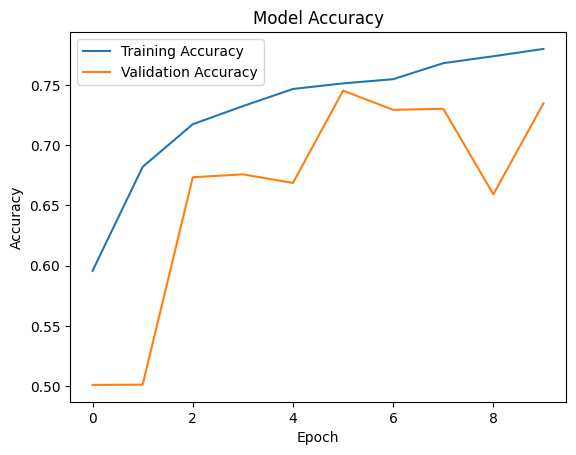

In [15]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [16]:
# Save the model in recommended Keras format
model.save('cats_vs_dogs.keras')

# Load the saved model
loaded_model = tf.keras.models.load_model('cats_vs_dogs.keras')

In [17]:
#  Predict New Image (Dog or Cat)

In [18]:
# Load an image from the internet
img_url = "https://content.lyka.com.au/f/1016262/2119x1415/56d51ba88d/samoyed.jpg/m/640x427/smart"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))


In [19]:
# Convert image to array and preprocess
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize


In [20]:
# Make prediction
prediction_score = loaded_model.predict(img_array)[0][0]
predicted_label = int(prediction_score > 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step


In [21]:
# Map back to class name
class_map = {v: k for k, v in train_data.class_indices.items()}
print(f"Predicted class: {class_map[predicted_label]}")

Predicted class: dog
